In [1]:
!awk '{print $1"," $4}' refined-set/index/INDEX_refined_set.2020 > index_clean

In [2]:
!head index_clean 

#,
#,protein-ligand
#,complexes
#,July
#,resolution,
#,
2tpi,Kd=49uM
4tln,Ki=190uM
1rnt,Kd=6.5uM
4ts1,Kd=11.6uM


In [3]:
#replace the character '=' with ',' in the file index_clean using sed
!sed -i 's/=/,/g' index_clean

In [4]:
!head index_clean

#,
#,protein-ligand
#,complexes
#,July
#,resolution,
#,
2tpi,Kd,49uM
4tln,Ki,190uM
1rnt,Kd,6.5uM
4ts1,Kd,11.6uM


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('index_clean', delimiter=',', comment='#', header=None)

In [7]:
df

,0,1,2
0,2tpi,Kd,49uM
1,4tln,Ki,190uM
2,1rnt,Kd,6.5uM
3,4ts1,Kd,11.6uM
4,4tmn,Ki,0.068nM
...,...,...,...
5311,6d1i,Ki,81uM
5312,6uh0,Ki,853.1nM
5313,6k04,Ki,9.1nM
5314,6ic2,Ki,917.4nM


In [8]:
df[1].value_counts()

1
Kd     2783
Ki     2531
Ki<       2
Name: count, dtype: int64

In [9]:
df[2]

0          49uM
1         190uM
2         6.5uM
3        11.6uM
4       0.068nM
         ...   
5311       81uM
5312    853.1nM
5313      9.1nM
5314    917.4nM
5315        9nM
Name: 2, Length: 5316, dtype: object

In [10]:
#separate the last two characters from each of column 1 values
df['unit'] = df[2].str[-2:]

In [11]:
#remove the last two characters from each of column 1 values
df[2] = df[2].str[:-2]

In [12]:
df

,0,1,2,unit
0,2tpi,Kd,49,uM
1,4tln,Ki,190,uM
2,1rnt,Kd,6.5,uM
3,4ts1,Kd,11.6,uM
4,4tmn,Ki,0.068,nM
...,...,...,...,...
5311,6d1i,Ki,81,uM
5312,6uh0,Ki,853.1,nM
5313,6k04,Ki,9.1,nM
5314,6ic2,Ki,917.4,nM


In [13]:
#eliminate non numeric characters from column 1 values and eliminate = sign
df[2] = df[2].str.replace(r'=', '')
df[2] = df[2].str.replace(r'\D', '')

#convert column 1 values to numeric
df[2] = pd.to_numeric(df[2])

In [14]:
df

,0,1,2,unit
0,2tpi,Kd,49.000,uM
1,4tln,Ki,190.000,uM
2,1rnt,Kd,6.500,uM
3,4ts1,Kd,11.600,uM
4,4tmn,Ki,0.068,nM
...,...,...,...,...
5311,6d1i,Ki,81.000,uM
5312,6uh0,Ki,853.100,nM
5313,6k04,Ki,9.100,nM
5314,6ic2,Ki,917.400,nM


In [15]:
df['unit'].value_counts()

unit
uM    2672
nM    2225
mM     286
pM     132
fM       1
Name: count, dtype: int64

In [16]:
for value,unit in zip(df[2],df['unit']):
    if unit == 'mM':
        df["Molar"] = df[2]/1000
    elif unit == 'uM':
        df["Molar"] = df[2]/1000000
    elif unit == 'nM':
        df["Molar"] = df[2]/1000000000
    elif unit == 'pM':
        df["Molar"] = df[2]/1000000000000
    elif unit == 'fM':
        df["Molar"] = df[2]/1000000000000000        

In [17]:
df

,0,1,2,unit,Molar
0,2tpi,Kd,49.000,uM,4.900000e-08
1,4tln,Ki,190.000,uM,1.900000e-07
2,1rnt,Kd,6.500,uM,6.500000e-09
3,4ts1,Kd,11.600,uM,1.160000e-08
4,4tmn,Ki,0.068,nM,6.800000e-11
...,...,...,...,...,...
5311,6d1i,Ki,81.000,uM,8.100000e-08
5312,6uh0,Ki,853.100,nM,8.531000e-07
5313,6k04,Ki,9.100,nM,9.100000e-09
5314,6ic2,Ki,917.400,nM,9.174000e-07


In [18]:
#calculate pK values
df["pK"] = -1 * df["Molar"].apply(np.log10)

In [19]:
df

,0,1,2,unit,Molar,pK
0,2tpi,Kd,49.000,uM,4.900000e-08,7.309804
1,4tln,Ki,190.000,uM,1.900000e-07,6.721246
2,1rnt,Kd,6.500,uM,6.500000e-09,8.187087
3,4ts1,Kd,11.600,uM,1.160000e-08,7.935542
4,4tmn,Ki,0.068,nM,6.800000e-11,10.167491
...,...,...,...,...,...,...
5311,6d1i,Ki,81.000,uM,8.100000e-08,7.091515
5312,6uh0,Ki,853.100,nM,8.531000e-07,6.069000
5313,6k04,Ki,9.100,nM,9.100000e-09,8.040959
5314,6ic2,Ki,917.400,nM,9.174000e-07,6.037441


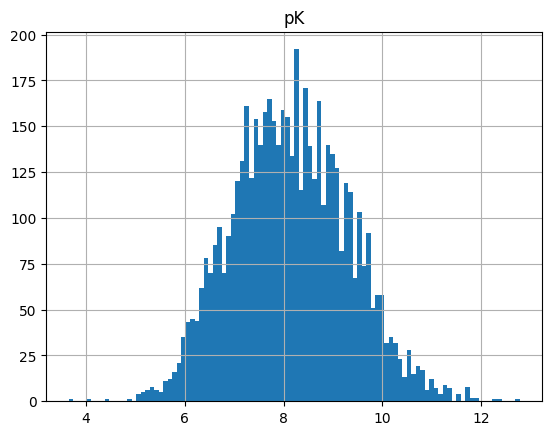

In [20]:
df.hist(column='pK', bins=100)
plt.show()

In [21]:
import MDAnalysis as mda

In [22]:
protein = mda.Universe('refined-set/2tpi/2tpi_protein.pdb')
ligand = mda.Universe('refined-set/2tpi/2tpi_ligand.mol2')

/home/scro4068/.local/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: HG
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [23]:
residue_len = []
for j,i in enumerate(df[0]):
    print(j, end='\r')
    protein = mda.Universe(f'refined-set/{i}/{i}_protein.pdb')
    residue_len.append(len(protein.residues)) 

/home/scro4068/.local/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


/home/scro4068/.local/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: CD
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


/home/scro4068/.local/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: MN
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


/home/scro4068/.local/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: NI
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


/home/scro4068/.local/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: CO
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


/home/scro4068/.local/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: SE
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


/home/scro4068/.local/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: SR
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


/home/scro4068/.local/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: LI
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [29]:
df['Residue lenght'] = residue_len

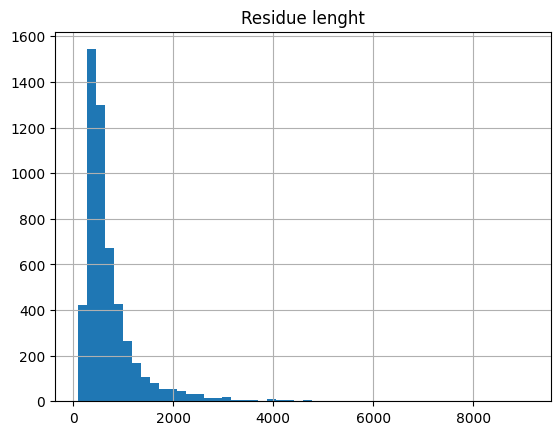

In [30]:
df.hist(column= 'Residue lenght', bins=50)
plt.show()

In [24]:
atom_len = []
for j,i in enumerate(df[0]):
    print(j, end='\r')
    ligand = mda.Universe(f'refined-set/{i}/{i}_ligand.mol2')
    atom_len.append(len(ligand.atoms)) 

In [25]:
df['Ligand atom nr'] = atom_len

In [26]:
df

,0,1,2,unit,Molar,pK,Ligand atom nr
0,2tpi,Kd,49.000,uM,4.900000e-08,7.309804,38
1,4tln,Ki,190.000,uM,1.900000e-07,6.721246,25
2,1rnt,Kd,6.500,uM,6.500000e-09,8.187087,36
3,4ts1,Kd,11.600,uM,1.160000e-08,7.935542,24
4,4tmn,Ki,0.068,nM,6.800000e-11,10.167491,68
...,...,...,...,...,...,...,...
5311,6d1i,Ki,81.000,uM,8.100000e-08,7.091515,27
5312,6uh0,Ki,853.100,nM,8.531000e-07,6.069000,22
5313,6k04,Ki,9.100,nM,9.100000e-09,8.040959,50
5314,6ic2,Ki,917.400,nM,9.174000e-07,6.037441,38


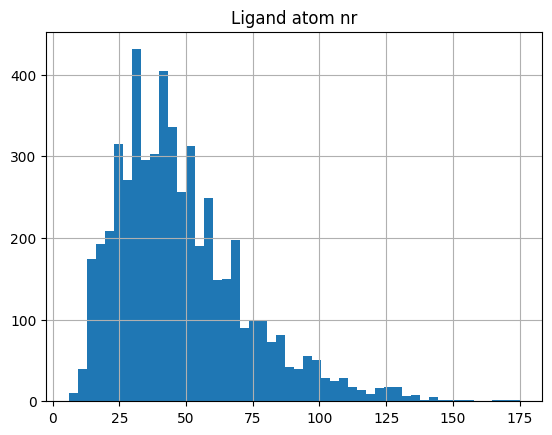

In [27]:
df.hist(column= "Ligand atom nr", bins=50)
plt.show()

In [28]:
len(ligand.atoms)

34